In [168]:
import cv2
import numpy as np
import xlsxwriter as xls
from skimage.feature import greycomatrix, greycoprops
import math
from scipy import stats
import matplotlib.pyplot as plt


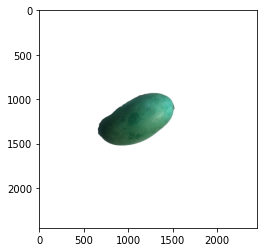

In [169]:
fitur_glcm = ['correlation','homogeneity', 'dissimilarity', 'contrast','energy','ASM']
angle = ['0','45','90','135']
fitur_bentuk = ['metric','eccentricity']
fitur_hsv = ['hue','saturation','values']

img = cv2.imread('logo.JPG')
plt.imshow(img)

In [170]:
grayscale= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                       # Rubah dalam grayscale
ret, img1= cv2.threshold(grayscale, 129, 255,cv2.THRESH_BINARY_INV)    # Melakukan tresholding
img1= cv2.dilate(img1.copy(),None,iterations= 5)                       # Menutup lubang pada citra
img2= cv2.erode(img1.copy(),None,iterations= 5)                        # Mengikis pingiran citra hasil dari dilasi
b,g,r= cv2.split(img)                                                  # Memisahkan unsur unsur warna dari citra 
rgba= [b,g,r, img1]
dst= cv2.merge(rgba,4)

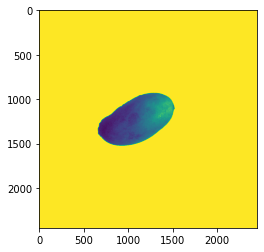

In [171]:
plt.imshow(grayscale)


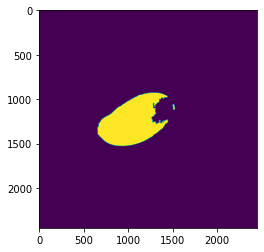

In [172]:
plt.imshow(img1)

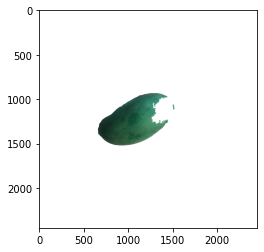

In [173]:
plt.imshow(dst)

In [174]:
contours, hierarchy = cv2.findContours(img1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
selected            = max(contours,key=cv2.contourArea)         # Menentukan kontur terbesar dari citra
x,y,w,h             = cv2.boundingRect(selected)
png                 = dst[y:y+h,x:x+w]
gray                = cv2.cvtColor(png, cv2.COLOR_BGR2GRAY)

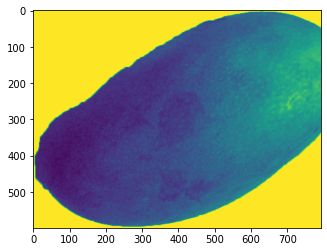

In [175]:
plt.imshow(gray)

In [176]:
distances = [5]
angles   = [0,np.pi/4,np.pi/2,3*np.pi/4]
levels   = 256
symmetric=True
normed   =True

glcm = greycomatrix(gray, distances, angles, levels, symmetric, normed)
glcm_props = [propery for name in fitur_glcm for propery in greycoprops(glcm, name)[0]]


In [177]:
glcm_props

[0.9861708468564153,
 0.9700545727102792,
 0.9746719323533828,
 0.9826672008384004,
 0.437746373371334,
 0.4179190876124246,
 0.42782139600674507,
 0.43319762232475517,
 4.596907594826615,
 6.27651111205904,
 5.764987841376724,
 4.802774815509959,
 183.58655361646782,
 395.2674764321973,
 334.694608118219,
 228.78590837350174,
 0.2956178523215905,
 0.28803844815663027,
 0.2899136731652624,
 0.2907299891105158,
 0.08738991461122968,
 0.08296614761647977,
 0.08404993788817458,
 0.08452392656820064]

In [178]:
# Eccentricity
dimensions  = png.shape
height      = png.shape[0]
width       = png.shape[1]
mayor       = max(height,width)
minor       = min(height,width)
eccentricity = math.sqrt(1-((minor*minor)/(mayor*mayor)))

# Metric
height1       = img.shape[0]
width1        = img.shape[1]
edge          = cv2.Canny(img,100,200)

k=0
keliling=1
while k<height1:
    l=0
    while l<width1:
        if edge[k,1]==255:
            keliling=keliling+1
        l=l+1
    k=k+1
k=0
luas=1
while k<height1:
    l=0
    while l<width1:
        if img1[k,1]==255:
            luas=luas+1
        l=l+1
    k=k+1
            
metric = (4*math.pi*luas)/(keliling*keliling)
shape_props=[eccentricity,metric]

In [179]:
shape_props

[0.6542097885260707, 12.566370614359172]

In [180]:
hsv = cv2.cvtColor(png, cv2.COLOR_BGR2HSV)
height=png.shape[0]
width=png.shape[1]
H=hsv[:,:,0]
S=hsv[:,:,1]
V=hsv[:,:,2]

hue = np.reshape(H,(1,height*width))
mode_h = stats.mode(hue[0])
if int(mode_h[0])==0:
    mode_hue = np.mean(H)
else:
    mode_hue = int(mode_h[0])
mean_s = np.mean(S)
mean_v = np.mean(V)
color_props=[mode_hue,mean_s,mean_v]

In [181]:
color_props

[29.741949967116913, 94.07615807490599, 151.335059695452]